In [99]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import csv

# Run time of models with fixed batch size, but varying layers

In [36]:
BATCHSIZE = 64
first_epoch_times = []
median_of_rest = []

for i in range(2,10):
    file = 'all_models/time_patch_cam_bs' + str(BATCHSIZE) + '_new_l1_l' + str(i) + '_v1.csv'
    df = pd.read_csv(file)
    first_epoch_times.append(df.iloc[0,1])
    median_of_rest.append(np.median(df[1:10]['time_run']))

file = 'all_models/time_patch_cam_bs' + str(BATCHSIZE) + '_new_full_v1.csv'
df = pd.read_csv(file)
first_epoch_times.append(df.iloc[0,1])
median_of_rest.append(np.median(df[1:10]['time_run']))


data = {'num_layers': range(2,11), 'first_epoch_times':first_epoch_times, 'median_of_rest':median_of_rest}
table = pd.DataFrame(data)
table['init_time'] = table['first_epoch_times'] - table['median_of_rest']
table

,num_layers,first_epoch_times,median_of_rest,init_time
0,2,4.943899,2.097142,2.846757
1,3,5.353932,2.257451,3.096481
2,4,5.473685,2.280472,3.193213
3,5,5.863441,2.450190,3.413251
4,6,6.190315,2.673081,3.517234
5,7,6.250330,2.683560,3.566770
6,8,6.248530,2.681575,3.566956
7,9,6.278940,2.682234,3.596705
8,10,6.404285,2.684103,3.720182


<function matplotlib.pyplot.show(*args, **kw)>

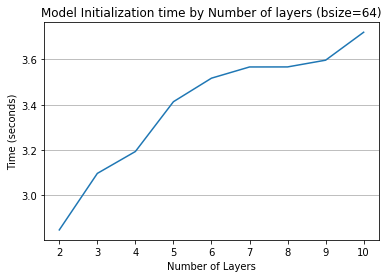

In [44]:
plt.plot(table['num_layers'], table['init_time'])
plt.title('Model Initialization time by Number of layers (bsize=64)')
plt.xlabel('Number of Layers')
plt.grid(axis='y')
plt.ylabel('Time (seconds)')
plt.show

# Run time over different batch sizes and layers

In [105]:
batchsizes = range(4,101,4)  # using data up to batchsize 100 bc 104 and 108 are missing
num_layers = []
batch_size = []
init_time = []

# get data from files
for i in range(2,10):
    file = 'all_models_v2/time_patch_cam_new_l1_l' + str(i) + '_v2.csv'
    df = pd.read_csv(file)
    #init_ts = []
    
    for b in range(len(batchsizes)):
        first_epoch_t = df.iloc[b * 11,1]
        median_of_rest = np.median(df.iloc[(b*11)+1:(b*11)+10,1])
        init_t = first_epoch_t - median_of_rest
        #init_ts.append(init_t)
        num_layers.append(i)
        batch_size.append(batchsizes[b])
        init_time.append(init_t)
        
data = {'num_layers':num_layers, 'batch_size':batch_size, 'init_time':init_time}
df = pd.DataFrame(data)
df

,num_layers,batch_size,init_time
0,2,4,1.785687
1,2,8,0.560531
2,2,12,0.669821
3,2,16,0.792024
4,2,20,0.937752
...,...,...,...
195,9,84,0.720045
196,9,88,0.612051
197,9,92,0.688216
198,9,96,0.657635


<function matplotlib.pyplot.show(*args, **kw)>

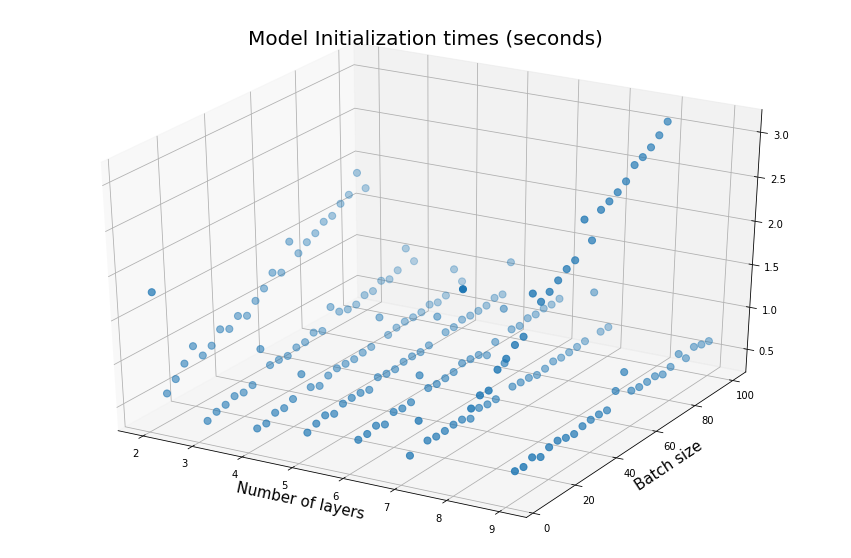

In [121]:
# plot fig.

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['num_layers'], df['batch_size'], df['init_time'], s=50)
plt.title('Model Initialization times (seconds)', size=20)
plt.xlabel('Number of layers', size=15)
plt.ylabel('Batch size', size=15)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

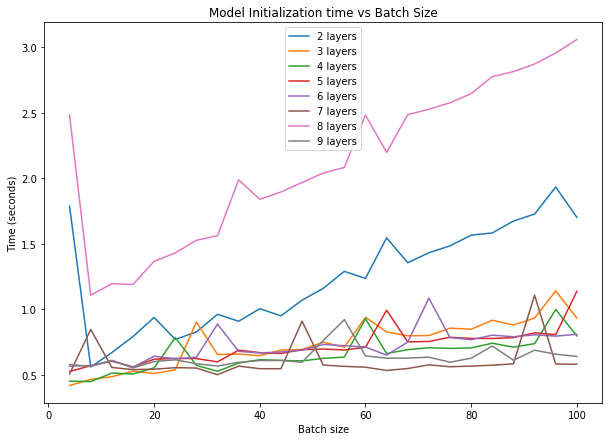

In [127]:
# plot batch size vs init time

legend_labels = []
for i in range(2,10):
    legend_labels.append(str(i) + " layers")


plot = plt.figure(figsize=(10,7))
for num_layers in range(2,10):
    df2 = df[df['num_layers']==num_layers]
    plt.plot(df2['batch_size'], df2['init_time'])
    
plt.legend(legend_labels)
plt.title('Model Initialization time vs Batch Size')
plt.xlabel('Batch size')
plt.ylabel('Time (seconds)')
plt.show